In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20, 10)

import warnings
warnings.filterwarnings('ignore')

# Import du dataset

In [3]:
raw = pd.read_csv('Train_UWu5bXk.txt')
data = raw.copy()
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.shape

(8523, 12)

In [4]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Preprocessing

In [34]:
preproc = data.copy()

In [35]:
# on minimise les noms de colonnes pour plus de facilité
preproc.columns = preproc.columns.str.lower()
preproc.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

### Item weight

In [36]:
# on regarde si, quand le poids manque, il existe une autre instance qui référence bien le poids
missing_weight_ids = preproc[preproc.item_weight.isnull()].item_identifier.unique().tolist()
preproc[preproc.item_identifier.isin(missing_weight_ids)].head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


In [37]:
# on regarde si pour un article en particulier le poids existe quelque part
preproc[preproc.item_identifier == 'FDA15']

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [56]:
# le poids peut parfois être référencé !
# on crée une table qui référence le poids par article et on la rattache à preproc
weight_ref = preproc.groupby('item_identifier').agg({'item_weight': np.mean})
weight_ref = weight_ref.reset_index()
weight_ref = weight_ref.rename({'item_weight': 'item_ref_weight'}, axis=1)
preproc = preproc.merge(weight_ref, left_on='item_identifier', right_on='item_identifier')
preproc.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_ref_weight
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.3
1,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.3
2,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.3
3,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.3
4,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.3


In [70]:
# est-ce qu'il manque toujours des poids ?
preproc.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
item_ref_weight                 4
dtype: int64

In [78]:
# on drop les quatre enregistrements ou le poids manque toujours
preproc = preproc.drop(preproc[preproc.item_ref_weight.isnull()].index)

In [84]:
# on peut maintenant dropper l'ancienne colonne poids, pour la remplacer par la nouvelle
# preproc = preproc.drop('item_weight', axis=1)
preproc.rename(columns={'item_ref_weight': 'item_weight'}, inplace=True)

In [85]:
preproc.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.3
1,FDA15,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.3
2,FDA15,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.3
3,FDA15,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.3
4,FDA15,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.3


### Item fat content

In [88]:
print(preproc.item_fat_content.value_counts())

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64


In [89]:
sv_preproc = preproc.copy()

In [92]:
# on remplace Low Fat, LF et low fat par LOW
# on remplace Regular et reg par REG
preproc[preproc.item_fat_content.isin(['Low', 'LF', 'low' ])].item_fat_content = 'LOW'

In [100]:
def ifc_replace(instance):
    low = ['Low Fat', 'LF', 'low fat']
    reg = ['Regular', 'reg']
    if instance.item_fat_content in low:
        return 'LOW'
    elif instance.item_fat_content in reg:
        return 'REG'

preproc['item_fat_content'] = preproc.apply(lambda x: ifc_replace(x), axis=1)

In [101]:
print(preproc.item_fat_content.value_counts())

LOW    5516
REG    3003
Name: item_fat_content, dtype: int64


### Item visibility

In [104]:
preproc.item_visibility.describe()

count    8519.000000
mean        0.066112
std         0.051586
min         0.000000
25%         0.026983
50%         0.053925
75%         0.094558
max         0.328391
Name: item_visibility, dtype: float64

In [106]:
preproc[preproc.item_visibility == 0].shape[0]

526

In [107]:
preproc[(preproc.item_visibility != 0)].item_visibility.describe()

count    7993.000000
mean        0.070463
std         0.050295
min         0.003575
25%         0.031403
50%         0.057772
75%         0.098103
max         0.328391
Name: item_visibility, dtype: float64

### Item type

In [108]:
preproc.item_type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64

In [112]:
# on minimise et on remplace les espaces par des _
preproc.item_type = preproc.item_type.str.replace(pat=' ', repl='_').str.lower()

In [115]:
preproc.head(20)

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_weight
0,FDA15,LOW,0.016047,dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,FDA15,LOW,0.016055,dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.30
2,FDA15,LOW,0.016019,dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.30
3,FDA15,LOW,0.016088,dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.30
4,FDA15,LOW,0.026818,dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.30
5,FDA15,LOW,0.016009,dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392,9.30
6,FDA15,LOW,0.015945,dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392,9.30
7,FDA15,LOW,0.016113,dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208,9.30
8,DRC01,REG,0.019278,soft_drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
9,DRC01,REG,0.019309,soft_drinks,49.0692,OUT017,2007,NaN,Tier 2,Supermarket Type1,1478.0760,5.92


### Item MRP

In [116]:
preproc.item_mrp.describe()

count    8519.000000
mean      141.010019
std        62.283594
min        31.290000
25%        93.844900
50%       143.047000
75%       185.676600
max       266.888400
Name: item_mrp, dtype: float64

### Outlet identifier

In [117]:
preproc.outlet_identifier.nunique()

10

### Outlet size

In [127]:
preproc.groupby('outlet_identifier').agg({'outlet_size': 'unique', 'outlet_type': 'unique'})

,outlet_size,outlet_type
outlet_identifier,,
OUT010,[nan],[Grocery Store]
OUT013,[High],[Supermarket Type1]
OUT017,[nan],[Supermarket Type1]
OUT018,[Medium],[Supermarket Type2]
OUT019,[Small],[Grocery Store]
OUT027,[Medium],[Supermarket Type3]
OUT035,[Small],[Supermarket Type1]
OUT045,[nan],[Supermarket Type1]
OUT046,[Small],[Supermarket Type1]


In [137]:
# il manque les valeurs pour OUT010, OUT017 et OUT045 : on crée une valeur 'unknown'
def outlet_size_repl(instance):
    if instance.outlet_size == 'Medium':
        return 'M'
    elif instance.outlet_size == 'Small':
        return 'S'
    elif instance.outlet_size == 'High':
        return 'H'
    
preproc.outlet_size = preproc.apply(lambda x: outlet_size_repl(x), axis=1).fillna('U')

In [138]:
preproc.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_weight
0,FDA15,LOW,0.016047,dairy,249.8092,OUT049,1999,M,Tier 1,Supermarket Type1,3735.1380,9.3
1,FDA15,LOW,0.016055,dairy,250.2092,OUT045,2002,U,Tier 2,Supermarket Type1,5976.2208,9.3
2,FDA15,LOW,0.016019,dairy,248.5092,OUT035,2004,S,Tier 2,Supermarket Type1,6474.2392,9.3
3,FDA15,LOW,0.016088,dairy,249.6092,OUT018,2009,M,Tier 3,Supermarket Type2,5976.2208,9.3
4,FDA15,LOW,0.026818,dairy,248.9092,OUT010,1998,U,Tier 3,Grocery Store,498.0184,9.3


### Outlet type

In [139]:
preproc.outlet_type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [141]:
def outlet_type_repl(instance):
    if instance.outlet_type == 'Supermarket Type1':
        return 'supermarket_1'
    elif instance.outlet_type == 'Supermarket Type2':
        return 'supermarket_2'
    elif instance.outlet_type == 'Supermarket Type3':
        return 'supermarket_3'
    elif instance.outlet_type == 'Grocery Store':
        return 'grocery'

preproc.outlet_type = preproc.apply(lambda x: outlet_type_repl(x), axis=1)

In [142]:
preproc.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_weight
0,FDA15,LOW,0.016047,dairy,249.8092,OUT049,1999,M,Tier 1,supermarket_1,3735.1380,9.3
1,FDA15,LOW,0.016055,dairy,250.2092,OUT045,2002,U,Tier 2,supermarket_1,5976.2208,9.3
2,FDA15,LOW,0.016019,dairy,248.5092,OUT035,2004,S,Tier 2,supermarket_1,6474.2392,9.3
3,FDA15,LOW,0.016088,dairy,249.6092,OUT018,2009,M,Tier 3,supermarket_2,5976.2208,9.3
4,FDA15,LOW,0.026818,dairy,248.9092,OUT010,1998,U,Tier 3,grocery,498.0184,9.3


### Outlet location type

In [143]:
preproc.outlet_location_type.unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [145]:
preproc.outlet_location_type = preproc.outlet_location_type.str.replace(pat=' ', repl='_').str.lower()

In [146]:
preproc.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_weight
0,FDA15,LOW,0.016047,dairy,249.8092,OUT049,1999,M,tier_1,supermarket_1,3735.1380,9.3
1,FDA15,LOW,0.016055,dairy,250.2092,OUT045,2002,U,tier_2,supermarket_1,5976.2208,9.3
2,FDA15,LOW,0.016019,dairy,248.5092,OUT035,2004,S,tier_2,supermarket_1,6474.2392,9.3
3,FDA15,LOW,0.016088,dairy,249.6092,OUT018,2009,M,tier_3,supermarket_2,5976.2208,9.3
4,FDA15,LOW,0.026818,dairy,248.9092,OUT010,1998,U,tier_3,grocery,498.0184,9.3


### Outlet establishment year

In [149]:
# plutôt que d'utiliser l'année on calcule l'âge du magasin
preproc['outlet_age'] = (2019 - preproc.outlet_establishment_year)
preproc.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_weight,outlet_age
0,FDA15,LOW,0.016047,dairy,249.8092,OUT049,1999,M,tier_1,supermarket_1,3735.1380,9.3,20
1,FDA15,LOW,0.016055,dairy,250.2092,OUT045,2002,U,tier_2,supermarket_1,5976.2208,9.3,17
2,FDA15,LOW,0.016019,dairy,248.5092,OUT035,2004,S,tier_2,supermarket_1,6474.2392,9.3,15
3,FDA15,LOW,0.016088,dairy,249.6092,OUT018,2009,M,tier_3,supermarket_2,5976.2208,9.3,10
4,FDA15,LOW,0.026818,dairy,248.9092,OUT010,1998,U,tier_3,grocery,498.0184,9.3,21


In [150]:
# on peut dropper l'année
preproc = preproc.drop('outlet_establishment_year', axis=1)

In [152]:
preproc.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_weight,outlet_age
0,FDA15,LOW,0.016047,dairy,249.8092,OUT049,M,tier_1,supermarket_1,3735.1380,9.3,20
1,FDA15,LOW,0.016055,dairy,250.2092,OUT045,U,tier_2,supermarket_1,5976.2208,9.3,17
2,FDA15,LOW,0.016019,dairy,248.5092,OUT035,S,tier_2,supermarket_1,6474.2392,9.3,15
3,FDA15,LOW,0.016088,dairy,249.6092,OUT018,M,tier_3,supermarket_2,5976.2208,9.3,10
4,FDA15,LOW,0.026818,dairy,248.9092,OUT010,U,tier_3,grocery,498.0184,9.3,21


# EDA

In [156]:
eda = preproc.copy()

### Les types de produits varient-ils selon les magasins ? Quel impact sur le CA ?

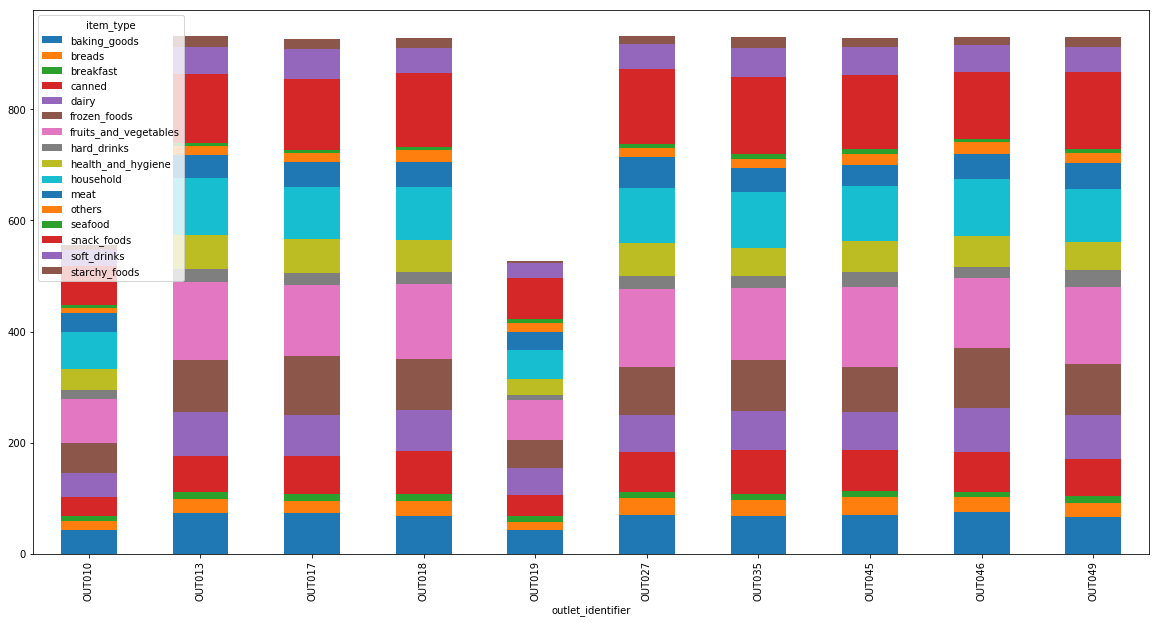

In [176]:
pd.crosstab(eda.outlet_identifier, eda.item_type).plot.bar(stacked=True);

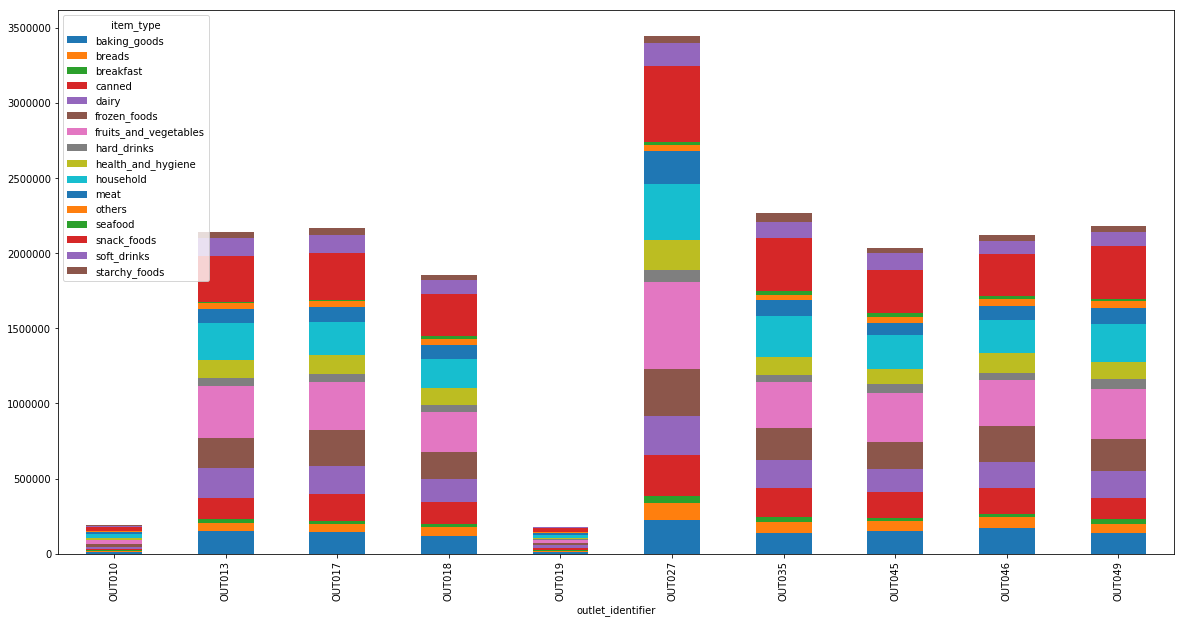

In [184]:
pd.crosstab(eda.outlet_identifier, eda.item_type, values=eda.item_outlet_sales, aggfunc=np.sum).plot.bar(stacked=True);

### Les MRP sont-ils différents selon les magasins ?

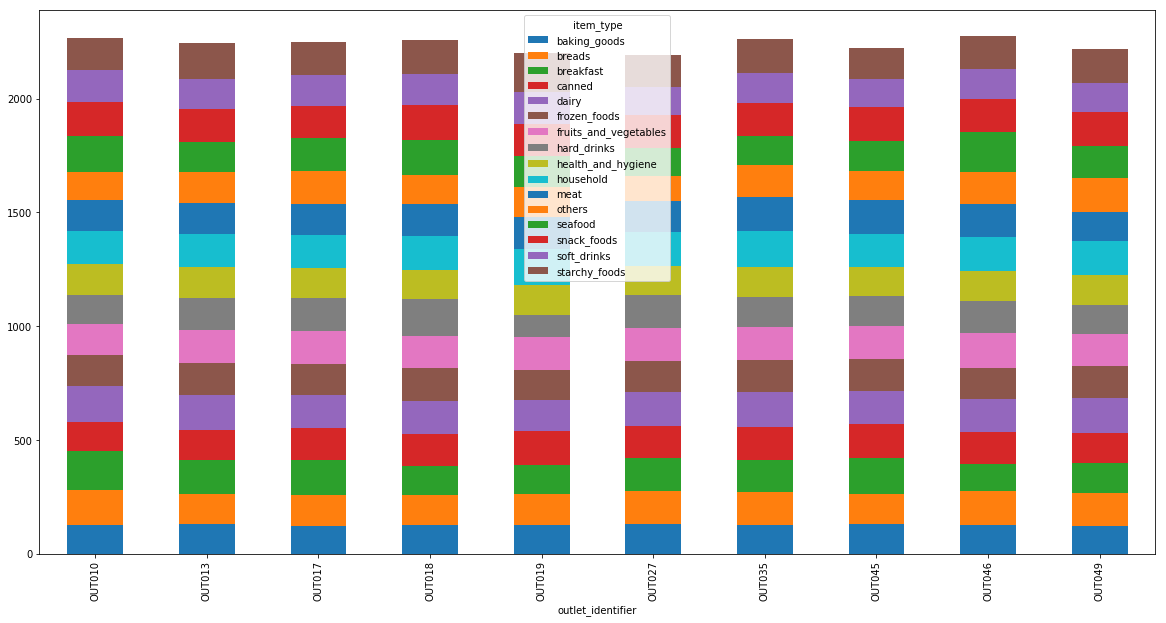

In [187]:
pd.crosstab(eda.outlet_identifier, eda.item_type, values=eda.item_mrp, aggfunc=np.mean).plot.bar(stacked=True);

In [190]:
# pas de différence, c'est la volumétrie qui fait tout visiblement
eda['vol'] = eda.item_outlet_sales / eda.item_mrp
eda.groupby('outlet_identifier').agg({'vol': np.sum})

,vol
outlet_identifier,
OUT010,1322.692377
OUT013,14913.254377
OUT017,15427.104933
OUT018,12854.383093
OUT019,1289.783236
OUT027,24785.572970
OUT035,15785.754166
OUT045,14475.949402
OUT046,15057.629973


In [191]:
eda = eda.drop('vol', axis=1)

### Quel impact de la taille du magasin sur le CA ?

In [197]:
pd.crosstab(eda.outlet_size, eda.item_type, values=eda.item_outlet_sales, aggfunc=np.mean)

item_type,baking_goods,breads,breakfast,canned,dairy,frozen_foods,fruits_and_vegetables,hard_drinks,health_and_hygiene,household,meat,others,seafood,snack_foods,soft_drinks,starchy_foods
outlet_size,,,,,,,,,,,,,,,,
H,2050.901134,2080.731528,2104.286508,2211.265203,2453.181713,2214.096189,2405.118103,2363.590000,1953.042439,2408.217992,2321.953141,2202.383175,1629.345760,2473.968987,2351.727890,2302.791947
M,2386.702771,2718.244814,2865.085356,2562.075105,2722.005174,2616.047703,2844.100923,2551.079280,2475.142832,2869.842203,2792.575217,2410.746565,2514.441257,2795.116737,2437.250807,2589.615229
S,1733.306492,2158.795546,1715.988533,2038.457667,1900.495836,1895.489818,1931.258454,1926.518932,1929.155500,1974.824976,1800.519024,1529.282073,2550.513350,1958.330459,1602.612305,2588.753047
U,1669.153402,1699.029128,1623.241877,2017.867739,1913.509200,1802.116163,1921.107714,1754.150979,1587.745880,1802.807833,1655.259155,1756.742248,2050.442067,1883.893133,1818.274770,1976.140851


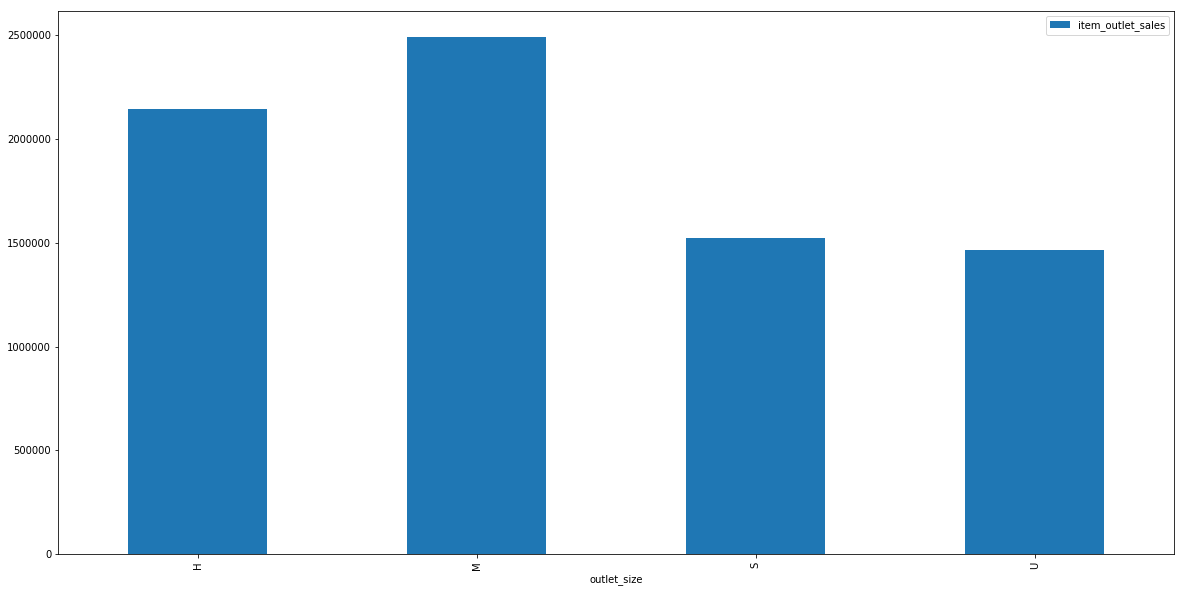

In [212]:
revenue_by_outlet = eda.groupby(['outlet_identifier', 'outlet_size', 'outlet_type']).agg({'item_outlet_sales': np.sum})
revenue_by_size = revenue_by_outlet.groupby('outlet_size').agg({'item_outlet_sales': np.mean})
revenue_by_size.plot.bar();

### Quel impact du type de magasin sur le CA ?

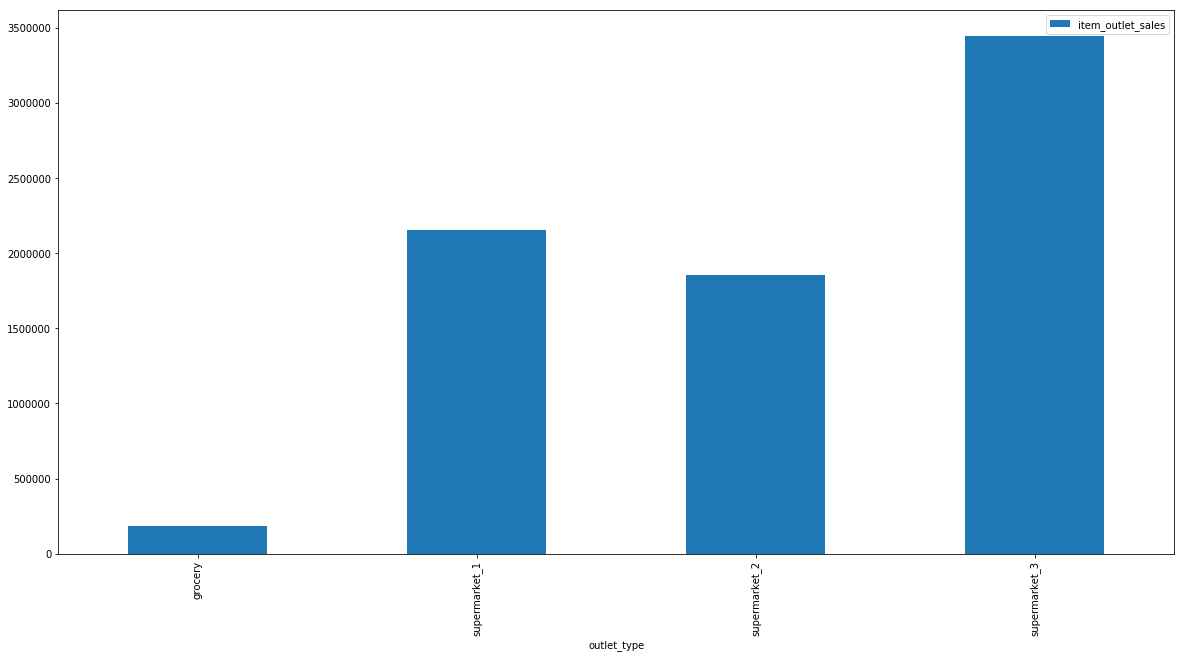

In [214]:
revenue_by_outlet_type = revenue_by_outlet.groupby('outlet_type').agg({'item_outlet_sales': np.mean})
revenue_by_outlet_type.plot.bar();

### Quel est l'impact du poids d'un article sur le revenu qu'il génère ?

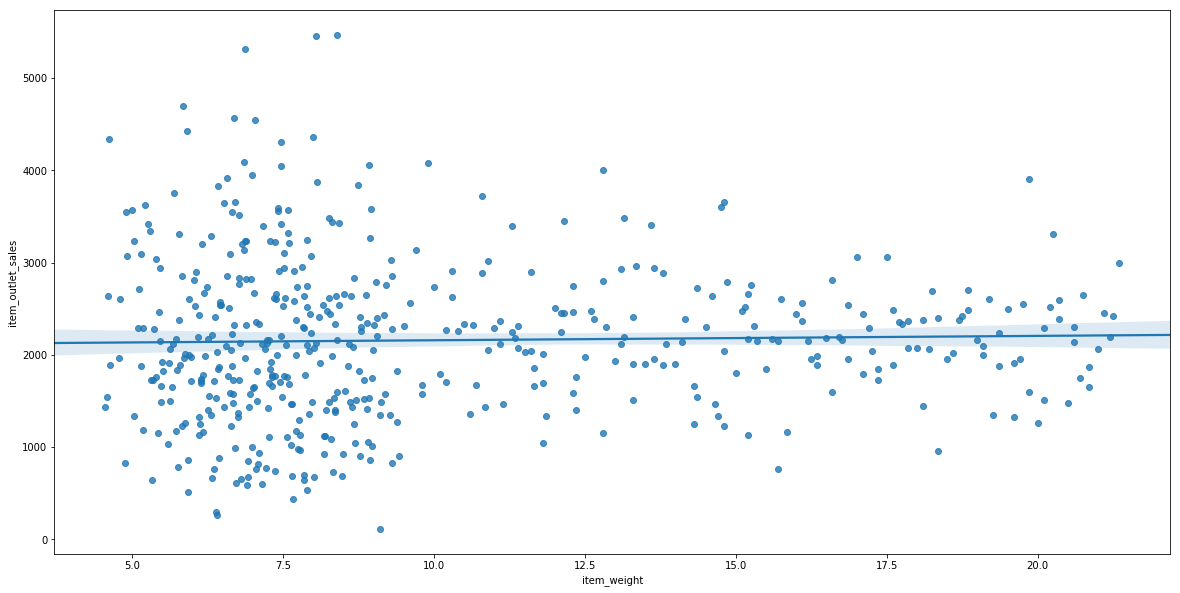

In [239]:
plt.figure(figsize=(20, 10))
sns.regplot(data=eda.groupby('item_weight').agg({'item_outlet_sales': np.mean}).reset_index(), x='item_weight', y='item_outlet_sales');

### Quel est l'impact du type de produit ?

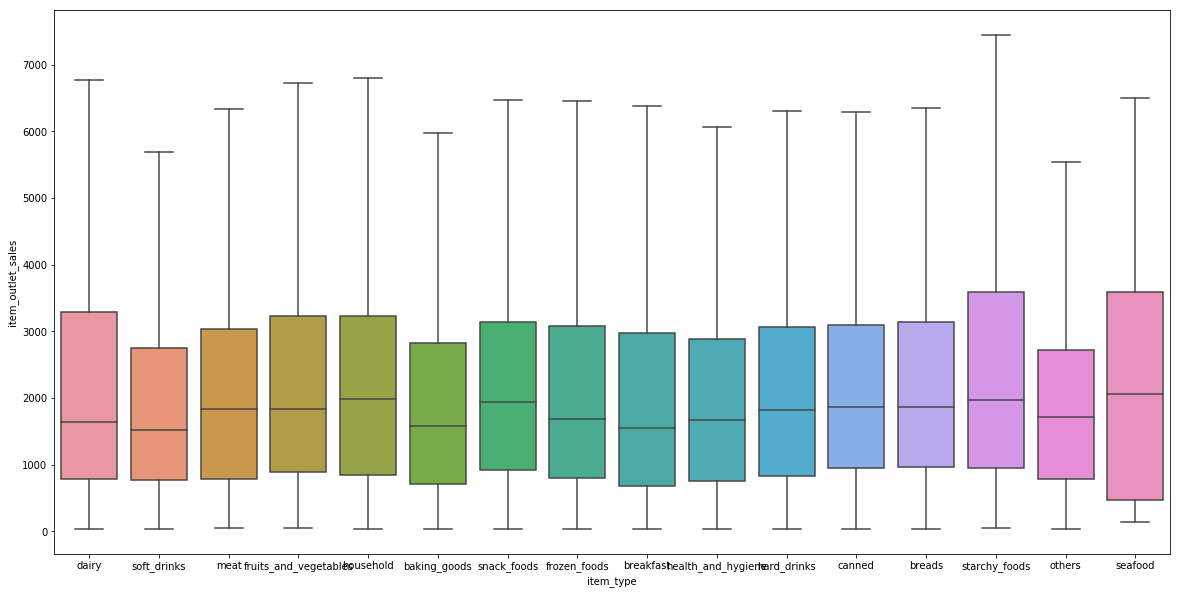

In [254]:
sns.boxplot(data=eda, x='item_type', y='item_outlet_sales', showfliers=False);

# Préparation data pour modèles

In [246]:
sv_preproc_2 = preproc.copy()

In [247]:
preproc.head()

,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_weight,outlet_age,item_identifier
0,LOW,0.016047,dairy,249.8092,OUT049,M,tier_1,supermarket_1,3735.1380,9.3,20,FDA15
1,LOW,0.016055,dairy,250.2092,OUT045,U,tier_2,supermarket_1,5976.2208,9.3,17,FDA15
2,LOW,0.016019,dairy,248.5092,OUT035,S,tier_2,supermarket_1,6474.2392,9.3,15,FDA15
3,LOW,0.016088,dairy,249.6092,OUT018,M,tier_3,supermarket_2,5976.2208,9.3,10,FDA15
4,LOW,0.026818,dairy,248.9092,OUT010,U,tier_3,grocery,498.0184,9.3,21,FDA15


In [248]:
preproc.shape

(8519, 12)

In [249]:
# on peut dropper l'ID des produits
preproc = preproc.drop('item_identifier', axis=1)

In [251]:
for feature in preproc.columns:
    if preproc[feature].nunique() < 30:
        print(feature, ':', preproc[feature].unique(), '/', preproc[feature].nunique())

item_fat_content : ['LOW' 'REG'] / 2
item_type : ['dairy' 'soft_drinks' 'meat' 'fruits_and_vegetables' 'household'
 'baking_goods' 'snack_foods' 'frozen_foods' 'breakfast'
 'health_and_hygiene' 'hard_drinks' 'canned' 'breads' 'starchy_foods'
 'others' 'seafood'] / 16
outlet_identifier : ['OUT049' 'OUT045' 'OUT035' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT017'
 'OUT046' 'OUT019'] / 10
outlet_size : ['M' 'U' 'S' 'H'] / 4
outlet_location_type : ['tier_1' 'tier_2' 'tier_3'] / 3
outlet_type : ['supermarket_1' 'supermarket_2' 'grocery' 'supermarket_3'] / 4
outlet_age : [20 17 15 10 21 32 34 12 22] / 9


In [258]:
preproc.dtypes['item_type']

dtype('O')

In [264]:
ohe_features = [feature for feature in preproc.columns if preproc.dtypes[feature] == 'O']
num_features = [feature for feature in preproc.columns if feature not in (ohe_features + ['item_outlet_sales'])]

### Encoding des features catégoriques

In [283]:
preproc = pd.get_dummies(preproc, columns=ohe_features)
preproc.drop('item_fat_content_REG', axis=1)
preproc.head()

,item_visibility,item_mrp,item_outlet_sales,item_weight,outlet_age,item_fat_content_LOW,item_fat_content_REG,item_type_baking_goods,item_type_breads,item_type_breakfast,...,outlet_size_M,outlet_size_S,outlet_size_U,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery,outlet_type_supermarket_1,outlet_type_supermarket_2,outlet_type_supermarket_3
0,0.016047,249.8092,3735.1380,9.3,20,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0.016055,250.2092,5976.2208,9.3,17,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0.016019,248.5092,6474.2392,9.3,15,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0.016088,249.6092,5976.2208,9.3,10,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0.026818,248.9092,498.0184,9.3,21,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


### Normalisation des features numériques

In [284]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
preproc[num_features] = std_scaler.fit_transform(preproc[num_features])
preproc.head()

,item_visibility,item_mrp,item_outlet_sales,item_weight,outlet_age,item_fat_content_LOW,item_fat_content_REG,item_type_baking_goods,item_type_breads,item_type_breakfast,...,outlet_size_M,outlet_size_S,outlet_size_U,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery,outlet_type_supermarket_1,outlet_type_supermarket_2,outlet_type_supermarket_3
0,-0.970582,1.746938,3735.1380,-0.769598,-0.138865,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,-0.970435,1.753360,5976.2208,-0.769598,-0.497347,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,-0.971123,1.726064,6474.2392,-0.769598,-0.736336,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,-0.969799,1.743727,5976.2208,-0.769598,-1.333806,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,-0.761773,1.732487,498.0184,-0.769598,-0.019371,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


### Création X_train et y_train

In [287]:
X_train = preproc.drop('item_outlet_sales', axis=1)
y_train = preproc.item_outlet_sales

# Mise en place d'un premier modèle

In [288]:
from sklearn.svm import LinearSVR

svr = LinearSVR()
svr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [291]:
from sklearn.metrics import r2_score, mean_squared_error

mean_squared_error(y_true=y_train, y_pred=svr.predict(X_train))

1548095.4333944654

### Essai avec une RandomForest

In [301]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_params = {
    'max_depth': np.arange(8, 13),
    'max_features': np.arange(20, 26),
    'min_samples_split': np.arange(90, 100),
    'n_estimators': [100]
}

rnd_rf = RandomizedSearchCV(estimator=rf, cv=5, scoring='neg_mean_squared_error', n_iter=50, param_distributions=rf_params, n_jobs=-1)
rnd_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': array([ 8,  9, 10, 11, 12]), 'max_features': array([20, 21, 22, 23, 24, 25]), 'min_samples_split': array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), 'n_estimators': [100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [313]:
np.sqrt(-rnd_rf.best_score_)

1078.6398269590222

In [303]:
rnd_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 90,
 'max_features': 25,
 'max_depth': 9}

In [304]:
best_rf = rnd_rf.best_estimator_

In [316]:
rf_fi = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf.feature_importances_ * 10})
rf_fi.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,item_mrp,5.485221
39,outlet_type_grocery,2.112575
42,outlet_type_supermarket_3,0.678908
27,outlet_identifier_OUT027,0.435761
3,outlet_age,0.315640
40,outlet_type_supermarket_1,0.266614
2,item_weight,0.128982
22,outlet_identifier_OUT010,0.114753
0,item_visibility,0.098491
26,outlet_identifier_OUT019,0.098073


### Pruning

In [321]:
pruned_features = rf_fi[rf_fi.Importance <= 0.002].Feature.values

In [323]:
X_train_pruned = X_train.drop(pruned_features, axis=1)

In [324]:
rnd_rf = RandomizedSearchCV(estimator=rf, cv=5, scoring='neg_mean_squared_error', n_iter=50, param_distributions=rf_params, n_jobs=-1)
rnd_rf.fit(X_train_pruned, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': array([ 8,  9, 10, 11, 12]), 'max_features': array([20, 21, 22, 23, 24, 25]), 'min_samples_split': array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), 'n_estimators': [100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [326]:
np.sqrt(-rnd_rf.best_score_)

1078.030137857664

In [328]:
from sklearn.model_selection import learning_curve

best_rf_p = rnd_rf.best_estimator_
train_sizes, train_scores, val_scores = learning_curve(estimator=best_rf_p, X=X_train_pruned, y=y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

In [329]:
train_scores_mean = np.sqrt(-np.mean(train_scores, axis=1))
val_scores_mean = np.sqrt(-np.mean(val_scores, axis=1))

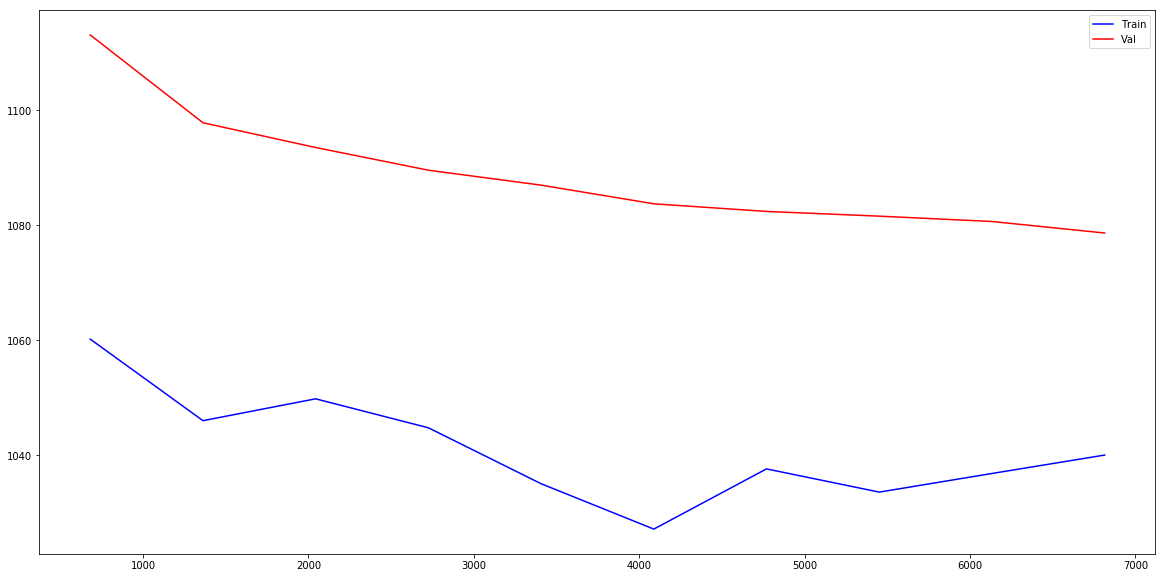

In [330]:
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'b', label='Train')
plt.plot(train_sizes, val_scores_mean, 'r', label='Val')
plt.legend()
plt.show()

In [333]:
rf_p_fi = pd.DataFrame({'Feature': X_train_pruned.columns, 'Importance': best_rf_p.feature_importances_})
rf_p_fi.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,item_mrp,0.550261
31,outlet_type_grocery,0.250656
34,outlet_type_supermarket_3,0.055204
24,outlet_identifier_OUT027,0.052552
3,outlet_age,0.033318
21,outlet_identifier_OUT010,0.012865
2,item_weight,0.010411
0,item_visibility,0.007567
32,outlet_type_supermarket_1,0.007439
23,outlet_identifier_OUT019,0.007080


In [334]:
pruned_features_2 = rf_p_fi[rf_p_fi.Importance <= 0.0002].Feature.values

In [335]:
pruned_features_2

array(['item_fat_content_LOW', 'item_fat_content_REG',
       'item_type_baking_goods', 'item_type_breads', 'item_type_canned',
       'item_type_meat', 'outlet_size_U'], dtype=object)

In [336]:
X_train_pruned = X_train_pruned.drop(pruned_features_2, axis=1)

In [337]:
rnd_rf = RandomizedSearchCV(estimator=rf, cv=5, scoring='neg_mean_squared_error', n_iter=50, param_distributions=rf_params, n_jobs=-1)
rnd_rf.fit(X_train_pruned, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': array([ 8,  9, 10, 11, 12]), 'max_features': array([20, 21, 22, 23, 24, 25]), 'min_samples_split': array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), 'n_estimators': [100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [339]:
np.sqrt(-rnd_rf.best_score_)

1078.9409836531695

In [341]:
rf_results = pd.DataFrame({'Pred': rnd_rf.best_estimator_.predict(X_train_pruned), 'True': y_train})
rf_results['Delta'] = np.abs(rf_results['Pred'] - rf_results['True'])
rf_results

,Pred,True,Delta
0,4244.755963,3735.1380,509.617963
1,4240.581639,5976.2208,1735.639161
2,4291.623756,6474.2392,2182.615444
3,3602.734317,5976.2208,2373.486483
4,571.945577,498.0184,73.927177
5,4296.675076,6474.2392,2177.564124
6,6266.378756,6474.2392,207.860444
7,4240.646493,5976.2208,1735.574307
8,706.290137,443.4228,262.867337
9,815.709773,1478.0760,662.366227


In [343]:
best_rf = rnd_rf.best_estimator_
rf_fi = pd.DataFrame({'feature': X_train_pruned.columns, 'importance': best_rf.feature_importances_})
rf_fi.sort_values(by='importance', ascending=False)

,feature,importance
1,item_mrp,0.546071
24,outlet_type_grocery,0.288400
27,outlet_type_supermarket_3,0.045895
3,outlet_age,0.041445
18,outlet_identifier_OUT027,0.036000
2,item_weight,0.011177
0,item_visibility,0.009096
25,outlet_type_supermarket_1,0.004724
15,outlet_identifier_OUT010,0.002748
17,outlet_identifier_OUT019,0.002614


### Essai avec un SGDR

In [351]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

sgd = SGDRegressor()

sgd_params = {
    'alpha': [0.005, 0.001, 0.05],
    'penalty': ['l1', 'l2']
}

gs_sgd = GridSearchCV(estimator=sgd, cv=5, scoring='neg_mean_squared_error', param_grid=sgd_params, n_jobs=-1)
gs_sgd.fit(X_train_pruned, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.005, 0.001, 0.05], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [352]:
np.sqrt(-gs_sgd.best_score_)

1132.3429979432856

In [356]:
best_sgd = gs_sgd.best_estimator_

sgd_fi = pd.DataFrame({'feature': X_train_pruned.columns, 'coef': best_sgd.coef_}).sort_values(by='coef', ascending=False)
sgd_fi

,feature,coef
27,outlet_type_supermarket_3,988.500089
18,outlet_identifier_OUT027,988.500089
1,item_mrp,951.041956
25,outlet_type_supermarket_1,862.312562
23,outlet_location_type_tier_3,328.742124
22,outlet_size_M,319.334570
19,outlet_identifier_OUT035,242.804406
21,outlet_identifier_OUT046,181.410554
11,item_type_seafood,71.982283
7,item_type_fruits_and_vegetables,65.533647


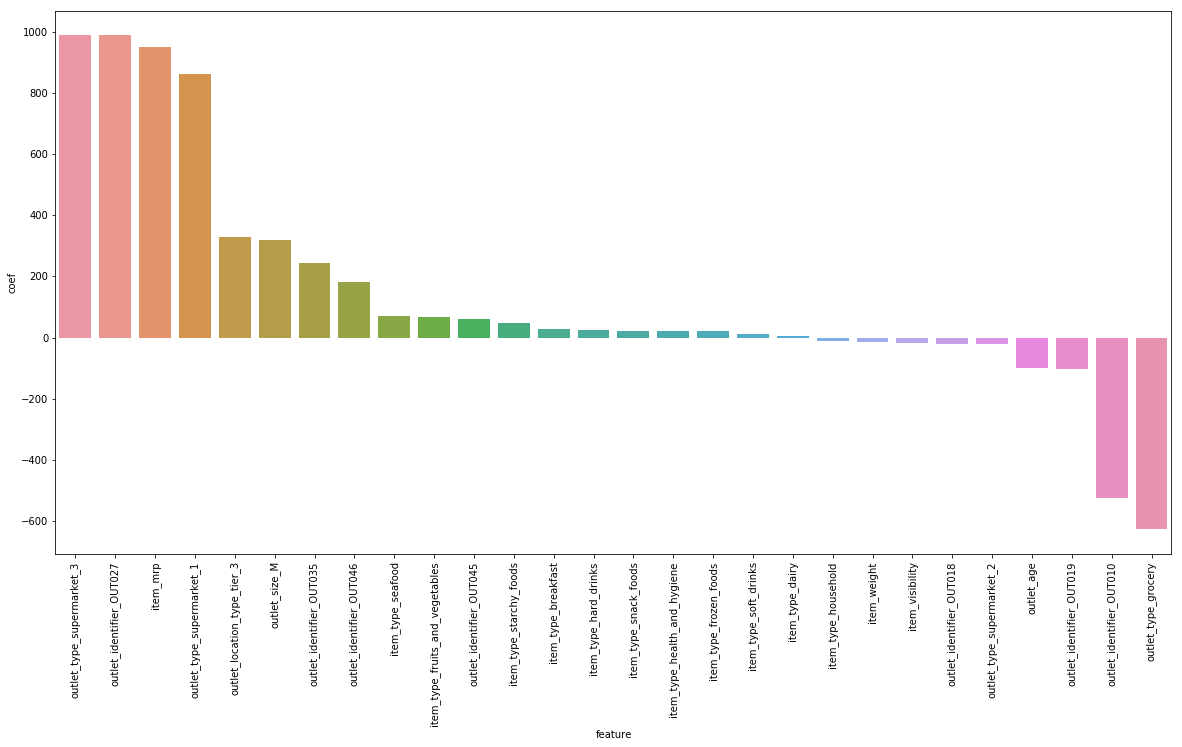

In [361]:
sns.barplot(data=sgd_fi, x='feature', y='coef')
plt.xticks(rotation=90);